# 🔭 **Modelo Pulsar para predecir eventos astronómicos** 🔭

El objetivo de este proyecto es decidir si un objeto observado es un Pulsar o no y usarlo para siguientes modelos

In [ ]:
#Importar librerías
import pandas as pd
import plotly.express as px
import sklearn
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Importar los archivos csv
train_file = '/content/drive/MyDrive/Colab Notebooks/Modelo Pulsar Astronomía/pulsar_data_train.csv'
test_file = '/content/drive/MyDrive/Colab Notebooks/Modelo Pulsar Astronomía/pulsar_data_test.csv'

**Datos de entrenamiento**: Aquellos que vamos a usar para que el modelo sepa las características de una estrella Pulsar, la cuál es una estrella de neutrones que contiene altos niveles de magnetismo y gira muy alto y rápido. Emiten pulsos de radiación a frecuencias constantes.

In [ ]:
#Cargar los datos a los CSV

#Cargar los datos para entrenar el modelo
print("Datos de entrenamiento")
df_train = pd.read_csv(train_file)
df_train

Datos de entrenamiento


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [ ]:
#Cargar los datos de prueba
print("Datos de prueba")
df_test = pd.read_csv(test_file)
df_test

Datos de prueba


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN
...,...,...,...,...,...,...,...,...,...
5365,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,NaN
5366,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,NaN
5367,136.171875,48.924385,NaN,0.063227,2.810201,18.695230,7.848577,69.388978,NaN
5368,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,NaN


# 🪐 **Exploración y preprocesamiento de los datos** 🪐

🧹 **Preprocesamiento de los datos** 🧹

Vamos a limpiar los datos para hacer un modelo preciso



In [ ]:
#Revisar que columnas existen en el DataFrame

print("\n 📌 Columnas en el Dataset: ")
print(df_train.columns)


 📌 Columnas en el Dataset: 
Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')


Se observan las siguientes columnas:

- La media de los datos dados.
- La desviación estandar
- La curtosis: es una medida estadistica que indica la comparación de la distribución de datos en comparación a la distribución normal.
- La oblicuidad del perfil integrado (es una medida de cuán asimétrica es una distribución alrededor de su medida)

## ℹ Extraer la información del DataSet

In [ ]:
print("\n 📚 Resumen del Dataset:")
print(df_train.info())


 📚 Resumen del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage

Se observa que todos los datos que usaremos son números con punto flotante o decimal (float) de 64 bits, hay un total de 9 columnas y usa 881.0 kb de almacenamiento.

El total de datos o de filas (entradas) que registera son 12528.

### 🎯 Definir objetivos

In [ ]:
#Vamos a suponer que target_class indica si el cuerpo es un pulsar o no la usamos como variable objetivo
objetivo = "target_class"

#Seleccionar todas las columnas menos el objetivo a predecir como caracteristicas
X_train = df_train.drop(columns=[objetivo])
y_train = df_train[objetivo]

X_test = df_test.drop(columns=[objetivo])
y_test = df_test[objetivo]

In [ ]:
from re import X
#Convertir etiquetas con valores categóricos a datos numéricos
if y_train.dtype == 'object':
  label_encoder = LabelEnconder()
  y_train = label_encoder.fit_transform(y_train)
  y_test = label_encoder.transform(y_test)


#Verificar el tamaño de los datos para el entrenamiento
print(f"Tamaño del entrenamiento: {X_train.shape}")
print(f"Tamaño de la prueba {X_test.shape}")

Tamaño del entrenamiento: (12528, 8)
Tamaño de la prueba (5370, 8)


## 💻 **Entrenar el modelo de Machine Learning**

Se va a entrenar el modelo para ver si un objeto astronómico es un pulsar o no.

🌲**RandomForestClassifier**: Se usa para crear un bosque aleatorio, que es un modelo de aprendizaje supervisado de ML basado en múltiples árboles de desición.

🎯**Accuracy_Score**: Contiene un módulo para evaluar la precisión de un modelo de clasificación con valores reales.

In [ ]:
from sklearn.preprocessing import StandardScaler
cols=X_train_balanced.columns
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train_balanced)
x_test=scaler.transform(X_test)

In [ ]:
x_train = pd.DataFrame(x_train, columns=[cols])

In [ ]:
x_train

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,0.899858,0.677262,-0.658732,-0.644977,-0.631574,-0.876390,0.342558,-0.006612
1,-0.242728,-0.822820,-0.489437,-0.374564,-0.649785,-0.909946,0.750565,0.384856
2,1.143688,1.274540,-0.780193,-0.667558,-0.641649,-0.715852,0.562365,0.085847
3,-0.040109,-0.829940,-0.433184,-0.383673,-0.640541,-0.786519,0.540902,0.109398
4,0.596030,1.604503,-0.563591,-0.639460,-0.640363,-0.831947,0.756511,0.329118
...,...,...,...,...,...,...,...,...
16841,-0.845996,-0.394397,0.607530,0.151496,0.506615,1.296062,-0.939176,-0.680214
16842,-0.184947,0.077815,-0.164512,-0.411670,-0.581390,-0.449148,0.086857,-0.270325
16843,0.256165,0.349301,-0.675665,-0.624215,-0.621089,-0.611651,0.296841,-0.134638
16844,-0.100522,0.220405,-0.057163,-0.402342,0.264970,1.308575,-0.888658,-0.676417


In [ ]:
print(X_train.shape)
print(y_train.shape)


(9273, 8)
(9273,)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Instanciar el imputador para reemplazar NaN por la media, quiere decir que calcularemos la media y la reemplazaremos
imputer = SimpleImputer(strategy='mean')  # O 'median' si prefieres usar la mediana

# Imputar los datos faltantes en los datos de entrenamiento y prueba
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


Modelo SVC -> (Support Vector Classifier), se adecua a los datos de entrenamiento (train) que uno proporciona, devolviendo un hiperplano "ideal" para categorizar los datos, y así clasificar los que son buenos y malos sin caer en el Overfitting.

In [ ]:
#Cambiar los datos del modelo con los nuevos datos imputados
# Instanciar el clasificador con el parámetro predeterminado
svc = SVC()

# Ajustar el clasificador a los datos de entrenamiento
svc.fit(X_train_imputed, y_train)

# Hacer las predicciones sobre el conjunto de prueba
y_pred = svc.predict(X_test_imputed)

# Imprimir la precisión del modelo
print('Model accuracy: {}'.format(accuracy_score(y_test, y_pred)))


Model accuracy: 0.9297951582867784


Necesitamos un modelo de tipo TensorFlow porque quiero exportarlo a una página web.

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Usando un modelo secuencial básico en TensorFlow (Keras)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_imputed.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train_imputed, y_train, epochs=12, batch_size=32)

# Hacer las predicciones
y_pred = model.predict(X_test_imputed)
y_pred = (y_pred > 0.5).astype(int)  # Convertir probabilidades a clases

# Imprimir la precisión del modelo
print('Model accuracy: {}'.format(accuracy_score(y_test, y_pred)))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
290/290 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9487 - loss: 0.3098
Epoch 2/12
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9731 - loss: 0.1136
Epoch 3/12
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9740 - loss: 0.1074
Epoch 4/12
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9740 - loss: 0.0985
Epoch 5/12
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9700 - loss: 0.1135
Epoch 6/12
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9716 - loss: 0.1091
Epoch 7/12
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: 0.0931
Epoch 8/12
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9690 - loss: 0.1156
Epoch 9/12
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.1000
Epoch 10/12
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9659 - loss: 0.1294
Epoch 11/12
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9767 - loss: 0.0815
Epoch 12/12
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Como un dato curioso, podemos observar que la presición es bastante similar en ambos modelos, quiere decir que los datos han quedado bien procesados.

# Guardar el modelo para la web


Tenermos que convertir el SVC en un formato Tensorflow

In [ ]:
model.save('prediccion_astronomia.h5')  # Guarda en formato .h5


In [ ]:
#Guardar en formato keras
model.save('prediccion_astronomia.keras')  # Guarda en formato .h5

In [ ]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 36.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2


In [ ]:
import tensorflow as tf

# Cargar el modelo .keras
model = tf.keras.models.load_model('prediccion_astronomia.keras')

# Guardar el modelo en formato SavedModel
model.save('Astronomia.h5')


In [ ]:
import tensorflow as tf

# Cargar el modelo .keras
model = tf.keras.models.load_model('prediccion_astronomia.keras')

# Exportar el modelo en formato SavedModel
model.export('Astronomia_saved_model')




Saved artifact at 'Astronomia_saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140004094173904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140004094177552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140004094178128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140004094178704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140004094177936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140004094179472: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
!tensorflowjs_converter --input_format=keras --output_path='/content/model' '/content/drive/MyDrive/Colab Notebooks/Modelo Pulsar Astronomía/Astronomia.h5'


2025-01-30 00:35:21.201986: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738197321.242723   51250 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738197321.255279   51250 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
usage: TensorFlow.js model converters. [-h]
                                       [--input_format {tf_hub,keras,keras_saved_model,tf_frozen_model,tf_saved_model,keras_keras,tfjs_layers_model}]
                                       [--output_format {tfjs_graph_model,keras,keras_saved_model,keras_keras,tfjs_layers_mo

In [ ]:
import tensorflowjs as tfjs
import tensorflow as tf

# Cargar el modelo Keras
model = tf.keras.models.load_model('/content/Astronomia.h5')




In [ ]:
!tensorflowjs_converter --input_format=keras --output_format=tfjs_layers_model "/content/Astronomia.h5" "/content/astronomia_model"



2025-01-30 00:43:55.573832: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738197835.614593   53337 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738197835.627049   53337 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


# Resumen del modelo entrenado

In [150]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,691 (10.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# Gráficas sobre el rendimiento del modelo

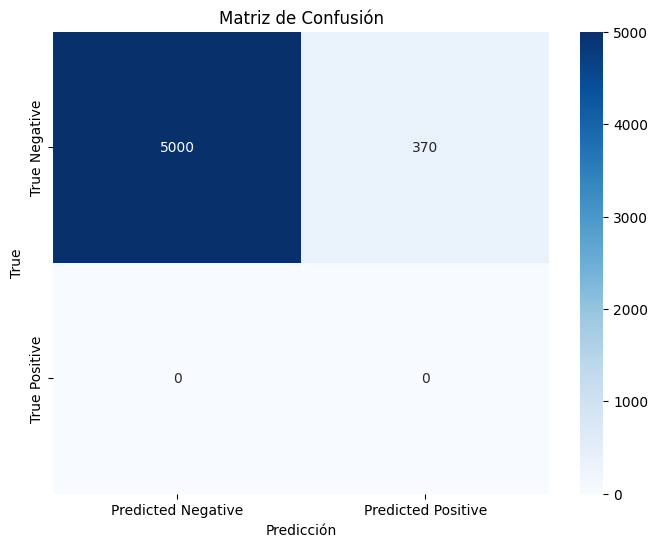

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative', 'True Positive'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('True')
plt.show()


Verdaderos Negativos (TN) = 5000: El modelo identificó correctamente los casos negativos.

Falsos Positivos (FP) = 370: El modelo cometió errores al clasificar algunos casos negativos como positivos.

Falsos Negativos (FN) = 0: El modelo no cometió errores al clasificar casos positivos como negativos.

Podemos observar que el modelo aún tiene señales de tener overfitting.

En la parte de True Negative: El modelo predijo muy bien que no había algo, cuando no lo había.

En los positivos esta mostrando 0, posiblemente por la manipulación de los datos anterior.


El modelo está haciendo clasificación erronea de **falsos positivos**

# Distribución de Datos de los Datos de Prueba

In [158]:
print(X_test.columns)


Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve',
       ' Skewness of the DM-SNR curve'],
      dtype='object')


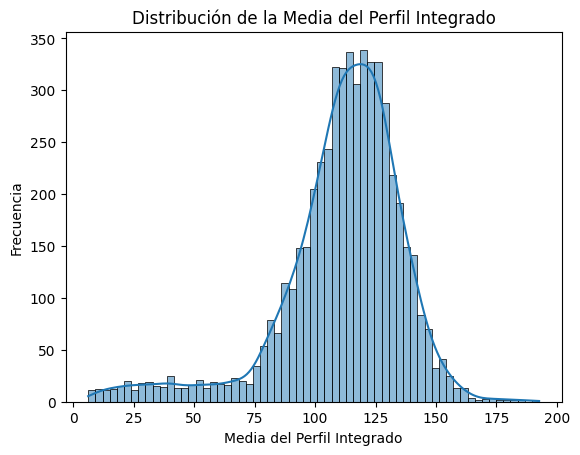

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar la distribución de la media de los perfiles integrados
sns.histplot(X_test[' Mean of the integrated profile'], kde=True)
plt.title('Distribución de la Media del Perfil Integrado')
plt.xlabel('Media del Perfil Integrado')
plt.ylabel('Frecuencia')
plt.show()


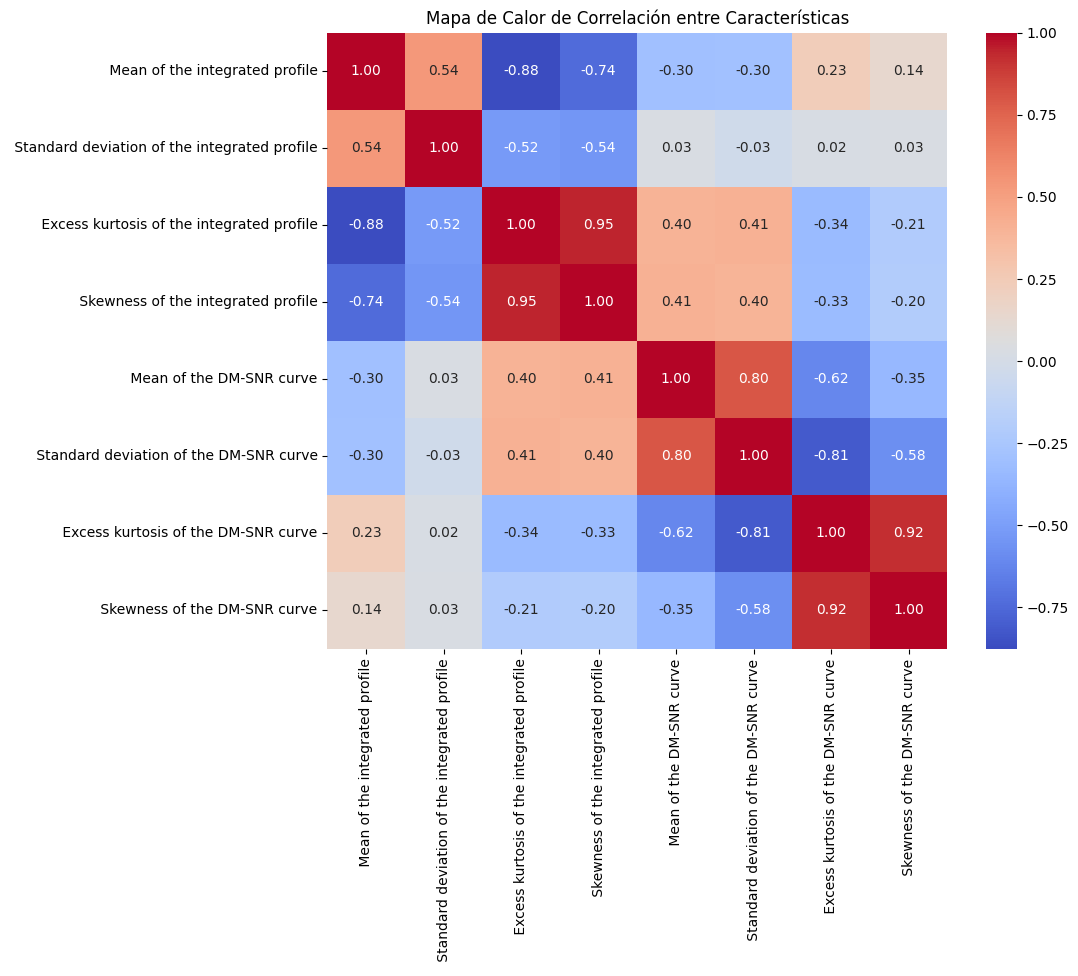

In [161]:
# Mapa de calor de correlación
correlation_matrix = X_test.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlación entre Características')
plt.show()


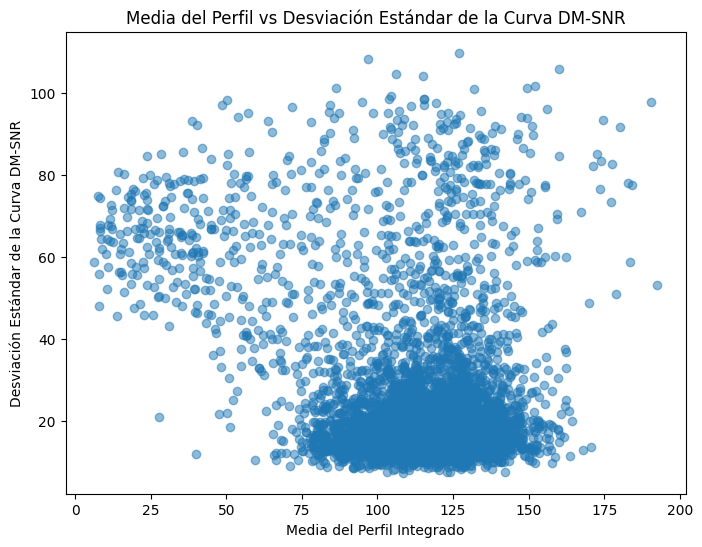

In [167]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[' Mean of the integrated profile'], X_test[' Standard deviation of the DM-SNR curve'], alpha=0.5)
plt.title('Media del Perfil vs Desviación Estándar de la Curva DM-SNR')
plt.xlabel('Media del Perfil Integrado')
plt.ylabel('Desviación Estándar de la Curva DM-SNR')
plt.show()


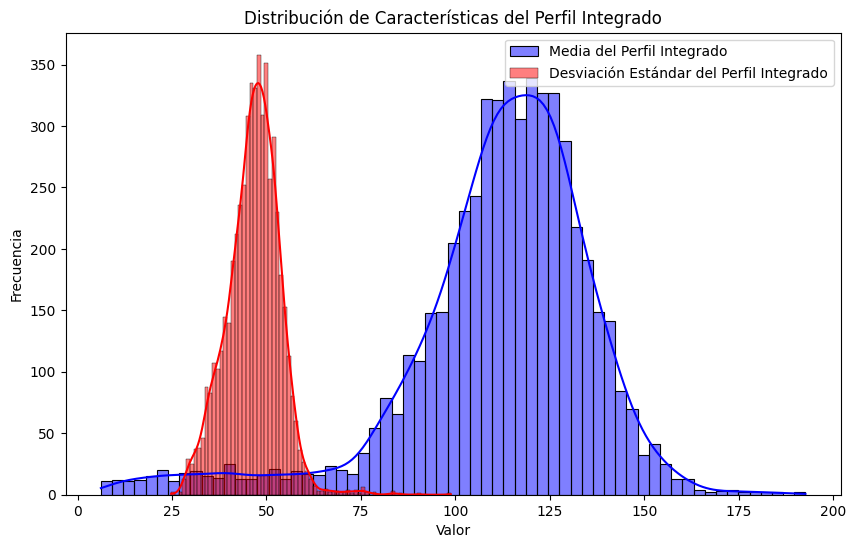

In [175]:
plt.figure(figsize=(10, 6))
sns.histplot(X_test[' Mean of the integrated profile'], kde=True, color='blue', label='Media del Perfil Integrado')
sns.histplot(X_test[' Standard deviation of the integrated profile'], kde=True, color='red', label='Desviación Estándar del Perfil Integrado')
plt.title('Distribución de Características del Perfil Integrado')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


Podemos observar que hay una alta variación en el perfil integrado y su desviación estándar. Los datos siguen un patron normal

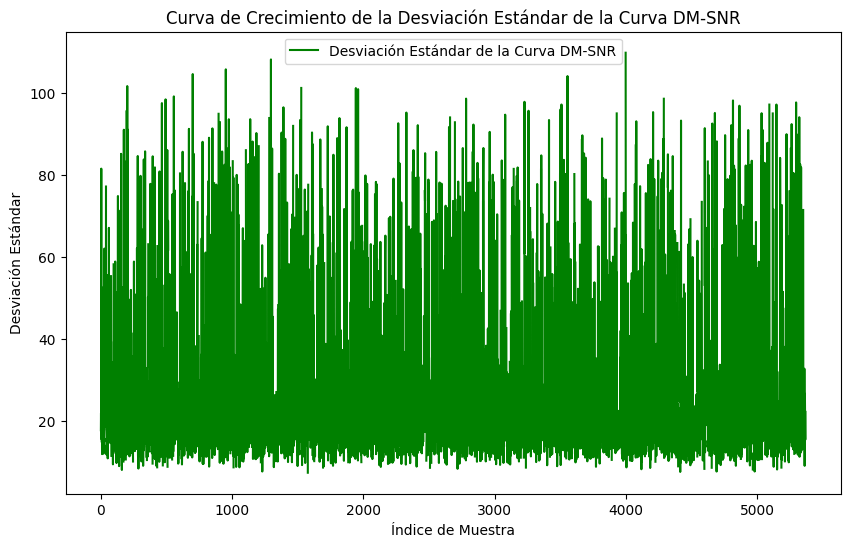

In [182]:
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, X_test[' Standard deviation of the DM-SNR curve'], label='Desviación Estándar de la Curva DM-SNR', color='green')

plt.xlabel('Índice de Muestra')
plt.ylabel('Desviación Estándar')
plt.title('Curva de Crecimiento de la Desviación Estándar de la Curva DM-SNR')
plt.legend()
plt.show()



# Curvas de Aprendizaje

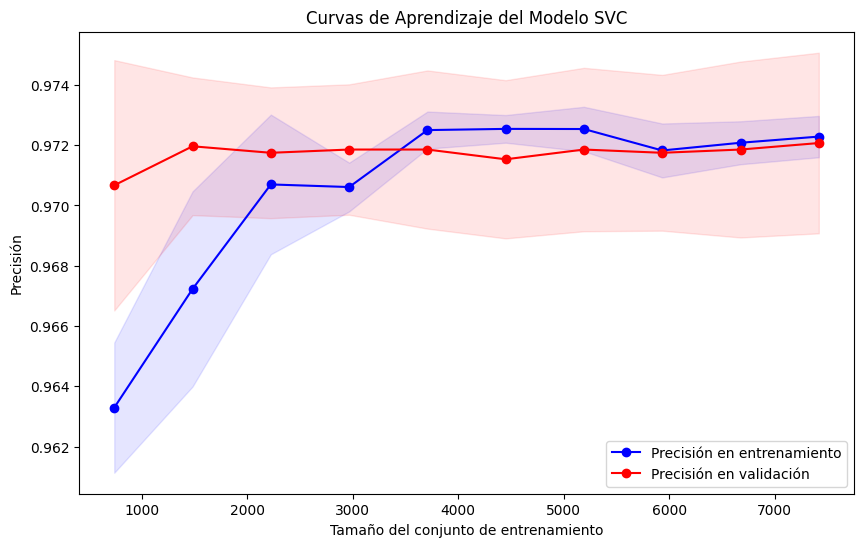

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

# Definir el clasificador
svc = SVC()

# Definir tamaños de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(
    svc, X_train_imputed, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcular la media y desviación estándar de cada puntuación
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Precisión en entrenamiento')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Precisión en validación')

# Agregar banda de desviación estándar
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.1)

# Configuración del gráfico
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curvas de Aprendizaje del Modelo SVC')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


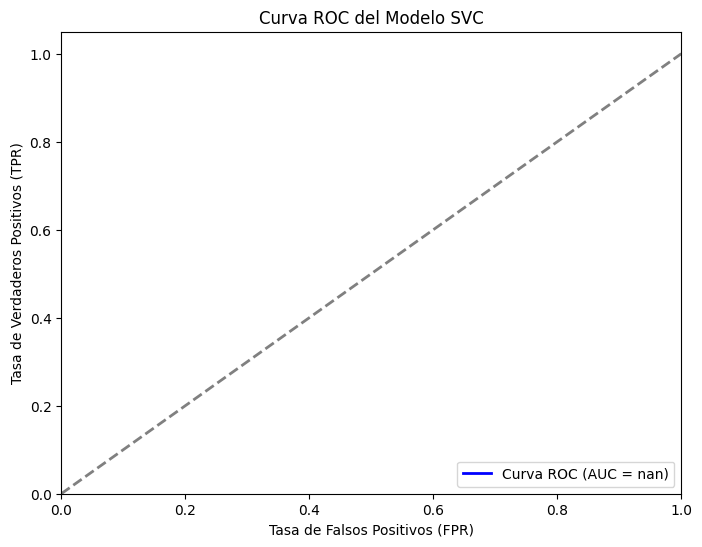

In [186]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Reentrenar el modelo con probabilidad habilitada
svc = SVC(probability=True)
svc.fit(X_train_imputed, y_train)

# Obtener las probabilidades de clase positiva
y_probs = svc.predict_proba(X_test_imputed)[:, 1]

# Calcular los valores de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)  # Área bajo la curva ROC (AUC)

# Graficar la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Línea base aleatoria

# Configuración del gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del Modelo SVC')
plt.legend(loc='lower right')
plt.show()
